In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
#initialize variables/model parameters
W=tf.Variable(tf.zeros([2,1]),dtype=tf.float32,name="weights")
b = tf.Variable(0,name="bias",dtype=tf.float32)


#define the training loop operations
def inference(X):
    #compute the inference model over data X and return the result
    return tf.matmul(X,W)+b
def loss(X,Y):
    #compute loss over training data X and expected output Y
    Y_predicted = inference(X)
    err = tf.reduce_sum(tf.squared_difference(Y,Y_predicted))
    return err
def inputs():
    #read/generate input training data X and expected outputs Y
    weight_age = [[84, 46], [73, 20], [65, 52], [70, 30], [76, 57], [69, 25], [63, 28], [72, 36], [79, 57], [75, 44], [27, 24], [89, 31], [65, 52], [57, 23], [59, 60], [69, 48], [60, 34], [79, 51], [75, 50], [82, 34], [59, 46], [67, 23], [85,37], [55, 40], [63, 30]]
    blood_fat_content = [354, 190, 405, 263, 451, 302, 288, 385, 402, 365, 209, 290, 346, 254, 395, 434, 220, 374, 308, 220, 311, 181, 274, 303, 244]
    
    return tf.to_float(weight_age),tf.to_float(blood_fat_content)
def train(total_loss):
    #train/adjust model parameters according to computed total loss
    learning_rate = 0.0000001
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)
    return optimizer
def evaluate(sess,X,Y):
    #evaluate the resulting trained model
    print( sess.run(inference ([  [80.,25.]   ])))
    print( sess.run(inference ([  [65.,25.]   ])))
    return
    
        

In [3]:
#Create a saver
saver = tf.train.Saver()

In [4]:
#Launch the graph in a session, setup boilerplate
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    X,Y = inputs()
    total_loss = loss(X,Y)
    train_op = train(total_loss)
    coord = tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess=sess,coord=coord)
    
    initial_step=0
    
    #verify if we don't have a checkpoint saved already
    #in interactive mode, there is no __file__ defined
    #os.getcwd() is a workaround
    modelpath=os.path.dirname(__file__) if('__file__') in dir() else os.getcwd()
    ckpt = tf.train.get_checkpoint_state(modelpath)
    
    if ckpt and ckpt.model_checkpoint_path:
        #Restores from checkpoints
        saver.restore(sess,ckpt.model_checkpoint_path)
        initial_step = int(ckpt.model_checkpoint_path.rsplit('-',1)[1])
    
    #actual training loop
    training_steps=1000
    
    for step in range(initial_step,training_steps):
        sess.run([train_op])
        if step%1000 ==0:
            saver.save(sess,"my-model",global_step=step)
        #for debugging and learning purposes, see how the loss gets decremented through training steps
        if step%10 ==0:
            print("loss: {0}".format(sess.run([total_loss])))
            evaluate(sess,X,Y)
            
    coord.request_stop()
    coord.join(threads)
    saver.save(sess,"my-model",global_step=training_steps)
    sess.close()

In [5]:
X,Y = inputs()

In [6]:
type(Y)

tensorflow.python.framework.ops.Tensor

In [7]:
print(Y)

Tensor("ToFloat_3:0", shape=(25,), dtype=float32)


In [11]:
with tf.Session() as sess:
    inputxy=(sess.run(X))
    z= sess.run(Y)
    

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
dx,dy=np.meshgrid(inputxy[:,0],inputxy[:,1])

In [28]:
fig = plt.figure(figsize=plt.figaspect(0.5))

In [21]:
ax = fig.add_subplot(1, 1, 1, projection='3d')

In [22]:
ax.plot_wireframe(dx, dy, z, rstride=10, cstride=10)

In [29]:
ax = fig.add_subplot(1, 1, 1, projection='3d')

In [30]:
from matplotlib import cm
surf = ax.plot_surface(dx, dy, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

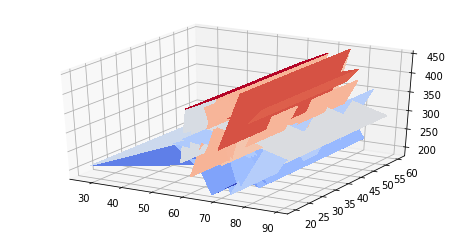

In [31]:
plt.show()